<h1 align='center'> 신호 및 시스템 실습 9</h1>

<p style="text-align: right"> 2021.5.13. (목)</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 장윤제  &nbsp;&nbsp;          학번: 20175334   &nbsp;&nbsp;         학과(전공): 스마트IoT
    
</div>

- Jupyter notebook에 대한 설명은 [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)을  참고하라.

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)
- Sympy의 복소수 관련 함수는 [sympy.functions.elementary.complexes](https://docs.sympy.org/latest/modules/functions/elementary.html#cbrt)를 참고하라.

* 제출 마감: 5월 15일 (토) 오후 6:00까지 최종본 제출


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def make_small_to_zero(X, atol=10e-15):
    X.real[np.isclose(X.real, 0, atol = atol)] = 0
    X.imag[np.isclose(X.imag, 0, atol = atol)] = 0
    
def sine_wave(A, f, phi, duration, fs):
    t = np.arange(0, duration, 1/fs)
    return t, A*np.sin(2*np.pi * f * t + phi)


def plot_signal_and_spectrum(x, X):
    plt.subplot(311)
    plt.stem(x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.subplot(312)
    plt.stem(np.abs(X))
    plt.xlabel("$k$")
    plt.ylabel("$|X[k]|$")
    plt.subplot(313)
    plt.stem(np.angle(X))
    plt.xlabel("$k$")
    plt.ylim(-1.1*np.pi, 1.1*np.pi)
    plt.yticks([-np.pi, np.pi], ["-$\pi$", "$\pi$"])
    plt.ylabel(r"$\angle X[k]$")    
    plt.tight_layout()
    plt.show() 
    
    

####  문제 1.

샘플링 주파수가 44100 Hz인 경우에, 주파수가 $f$ Hz인 정현파를 샘플링하여 만든 이산시간 신호를 다시 연속시간 신호로 변환할 때 변환된 연속시간 신호가 가질 수 있는 최대 주파수는 얼마인가?

**답**: 

$f_{max} = 22050$Hz

####  문제 2.

아래에 있는 x1은 정현파 신호를 샘플링한 이산시간 신호 $x[n]$의 1초 길이의 샘플을 담은 NumPy 배열이다. 이 이산신호에 대응하는 연속시간 정현파 신호의 주파수 $f$는 얼마인가?

**답**: 440Hz


In [7]:
fs = 44100
t, x1 = sine_wave(0.8, 440, 0, 1., fs)

#### 문제 3. 
문제 2에서 구한 이산시간 신호의 크기 spectrum과 위상 스펙트럼의 그래프를 그려라.단, DFT를 구할 때, np.fft.fft 함수를 사용하고, DFT를 구할 때 사용하는 샘플의 갯수는 44100 개를 사용하라.


In [8]:
x1.size

44100

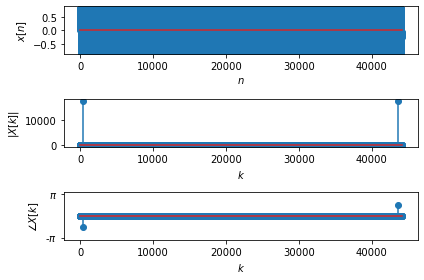

In [9]:
X1 = np.fft.fft(x1)
make_small_to_zero(X1, 1e-8)

plot_signal_and_spectrum(x1, X1)

#### 문제 4.
문제 3에서 $|X1[k]|$이 0이 아닌 $k$를 구하라.

**답**:  -440, 440

In [11]:
X1_mag = abs(X1)

In [12]:
np.where(X1_mag>0)      #인덱스를 어레이로 반환

# 44100 - 43660 = -440

(array([  440, 43660], dtype=int64),)

#### 문제 5.

문제 4에서 구한 $k$에 대응하는 연속시간 주파수를 구하고, 그 이유를 설명하라.

**답**: $k=440$에 대응하는 주파수는 440 Hz, $k = -440$에 대응하는 주파수는 -440 Hz

#### 문제 6. 
문제 2에서 구한 이산시간 신호 $x_1[n]$의 앞 512 개 샘플로 구성된 이산시간 신호 $x_2[n]$의 크기 spectrum과 위상 스펙트럼의 그래프를 그려라.단, DFT를 구할 때, np.fft.fft 함수를 사용하고, DFT를 구할 때 사용하는 샘플의 갯수는 512 개를 사용하라.

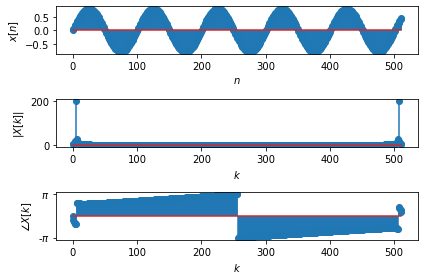

In [14]:
N = 512
x2 = x1[:N]
X2 = np.fft.fft(x2)
make_small_to_zero(X2, 1e-8)
plot_signal_and_spectrum(x2, X2)

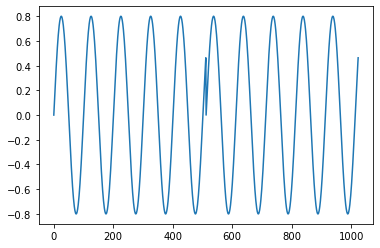

In [16]:
plt.plot(np.append(x1[:N], x1[:N]))

#### 문제 7.
문제 6에서 구한 $X_2[k]$ 가운데 이 0이 아닌 계수의 갯수를 구하라.

**답**: 512개

In [17]:
len(np.where(X2 !=0)[0])

512

In [23]:
np.where(X2 !=0)[0].size

512

#### 문제 8.

문제 7에서 구한 $|𝑋_2[𝑘]|$에서 $\arg \max_k |X_2[k]|$를 구하라.

In [1]:
np.where(np.abs(X2) > 100)

NameError: name 'np' is not defined

In [26]:
X2[5], X2[-5]

((67.55040651573931-187.30420246894914j),
 (67.55040651573931+187.30420246894917j))

In [27]:
np.argmax(np.abs(X2))

5

##### 참고: 이산 푸리에 변환의 주파수 해상도

구간 $[0, T_0]$ 사이에서 연속시간 신호\index{연속시간 신호} $x(t)$를 $N$ 개의 샘플로 샘플링한 경우를 생각해 보자. 이 때, 샘플링 주기는 $T_s = \dfrac{T_0}{N}$이고, 샘플링 주파수는 $f_s = \frac{1}{T_s} = \frac{N}{T_0}$이다. 샘플링 주파수를 Nyquist 샘플링 정리에 따라 결정했다면 연속시간 신호의 최대 주파수는 $f_{\max} = \frac{1}{2}f_s$이고, 연속시간 신호의 주파수 범위는 다음과 같다.
$$
-f_{\max} \le f \le f_{\max} \;\; \Leftrightarrow \;\;
-\dfrac{f_s}{2} \le f \le \dfrac{f_s}{2} 
$$
DFT의 인덱스는 이 주파수 구간을 $N$ 개의 샘플로 샘플링한 순서이므로 $N$-점 DFT가 표현할 수 있는 연속시간 주파수 해상도\index{주파수 해상도}는 다음과 같다.

$$
\Delta f = \dfrac{\dfrac{f_s}{2} - \left(-\dfrac{f_s}{2}\right)}{N} = \dfrac{f_s}{N}.
$$

$k$ 번째 인덱스에 대응하는 연속시간 주파수 $f_k$는 다음과 같다.
$$
 f_k = k \Delta f  = k\dfrac{f_s}{N}.
$$

#### 문제 9.
512 개의 샘플로 구한 DFT의 주파수 해상도를 구하라.

$\Delta f = \frac{44100}{512}$

In [2]:
df = fs / N
df

NameError: name 'fs' is not defined

#### 문제 10.

문제 9에서 구한 $k$에 대응하는 연속시간 주파수를 구하라.

$f_5 = 5 \Delta f = \frac{5 \times 44100}{512}$

In [18]:
5 * df, -5 * df

(430.6640625, -430.6640625)

#### 문제 11.

문제 10에서 구한 $k$에 대응하는 연속시간 주파수가 440 Hz와 다른 이유를 설명하고 이에 대한 해결 방법을 생각해 보라.

**답** : 

- 이유 : DFT에 사용한 신호의 샘플의 갯수를 $N$이라고 하면, 주파수 해상도는 $f_s/N$가 되는데, 440 Hz가 주파수 해상도의 정수배가 아니기 때문이다.

- 해결방법 : 주파수 해상도를 최대한 작게 만들어야 한다. 이를 위해서는 $N$을 최대한 크게 만들어야 한다.

##### 참고: 영연장(zero-padding)

다음과 같이 길이가 $N$인 신호 $x[n]$에 $N$ 개의 0을 덧붙여서 만든 신호 $y[n]$을 생각해 보자. 

$$y[n] = \{x[0], x[1], \cdots, x[N-1], 0, 0, \cdots, 0\}.$$

이와 같이 주어진 신호의 뒤에 필요한 갯수만큼의 0을 덧붙여서 신호의 길이를 연장하는 방법을 영 연장이라고 한다.

$y[n]$의 샘플의 갯수는  $2N$이므로, $y[n]$의 DFT, $Y[k]$는 다음과 같다.

\begin{align*}
  Y[k] &= {\displaystyle \sum_{n=0}^{2N-1} y[n] e^{-j\frac{2\pi}{2N}nk} }\\[3mm]
 &= {\displaystyle \sum_{n=0}^{N-1} x[n] e^{-j\frac{2\pi}{N}n(k/2)}} \\[3mm]      
 &= X\left[\dfrac{k}{2}\right].
 \end{align*}

즉, $Y[k]$는 $X[k]$에 비해서 주파수 영역에서 샘플의 갯수가 2 배가 되고, 결과적으로 주파수 영역에서 해상도가 2 배 증가한 신호이다 

#### 문제 12.

문제 5에서 구한 $x_2[n]$ 뒤에 0을 추가하여 샘플의 길이를 44100 개로 만든 신호를 $x_3[n]$이라고 하자. $x_3[n]$의 크기 spectrum과 위상 스펙트럼의 그래프를 그려라.단, DFT를 구할 때, np.fft.fft 함수를 사용하고, DFT를 구할 때 사용하는 샘플의 갯수는 44100 개를 사용하라.

In [3]:
x3 = np.append(x2, np.zeros(44100-x2.size))
x3.size

NameError: name 'np' is not defined

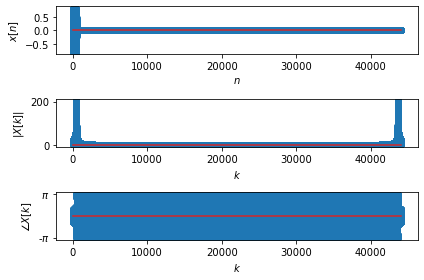

In [35]:
X3 = np.fft.fft(x3)
make_small_to_zero(X3)
plot_signal_and_spectrum(x3, X3)

In [37]:
np.abs(X3)[440-20:440+21]

array([187.37155749, 188.86023665, 190.27128517, 191.60368664,
       192.85648467, 194.02878373, 195.11974989, 196.12861152,
       197.05465996, 197.89725011, 198.65580094, 199.32979599,
       199.91878378, 200.42237816, 200.84025859, 201.17217045,
       201.41792511, 201.57740015, 201.65053936, 201.63735274,
       201.53791646, 201.35237273, 201.08092962, 200.7238608 ,
       200.28150526, 199.75426694, 199.14261432, 198.44707994,
       197.66825984, 196.80681304, 195.86346079, 194.83898597,
       193.73423224, 192.5501033 , 191.287562  , 189.94762938,
       188.53138376, 187.03995971, 185.47454695, 183.83638923,
       182.1267832 ])

#### 문제 13.
다음 tone music 신호의 스펙트럼을 그려라.

In [19]:
def single_tone(duration, A, f, phi, fs=44100):
    t = np.arange(0, duration, 1/fs)
    return t, A * np.sin(2 * np.pi * f * t + phi)

key_no = {'R':0, 'C4': 40, 'D4':42, 'E4':44, 'F4':45, 
           'G4':47, 'A4': 49, 'B4': 51, 'C5':52}
fs = 44100
school_bell_sop_note = ['G4', 'G4', 'A4', 'A4', 'G4', 'G4', 'E4', 'E4', 'G4', 'G4', 'E4', 'E4', 'D4', 'D4', 'D4', 'D4']
school_bell_sop = [key_no[key] for key in  school_bell_sop_note]

school_bell_sop_wave = np.array([])
for n in school_bell_sop:
    f = 440.0 * (2 ** ((n-49)/12))
    t, tone = single_tone(0.1 , 0.8, f, 0)
    school_bell_sop_wave = np.append(school_bell_sop_wave, tone)

In [20]:
from IPython.display import Audio
Audio(school_bell_sop_wave, rate=fs)

In [21]:
school_bell_sop_wave.size

70560

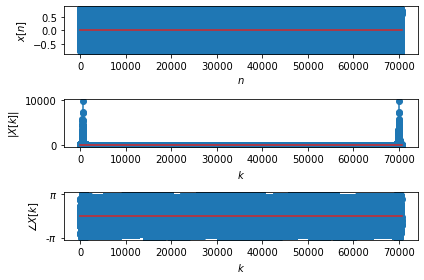

In [23]:
Xs = np.fft.fft(school_bell_sop_wave)
plot_signal_and_spectrum(school_bell_sop_wave, Xs)

In [24]:
df = fs / Xs.size
440 / df

704.0

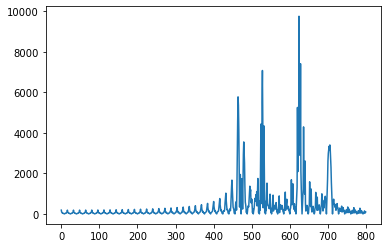

In [25]:
plt.plot(np.abs(Xs[:800]))
plt.show()

#### 문제 14.
문제 13에서 구한 DFT의 주파수 해상도를 구하라.

**답** : 44100 / 70560 = 0.625

In [26]:
fs / Xs.size

0.625

In [27]:
def get_fade_window_2(duration=1, t_in=0.02, t_out=0.02, fs=44100):

    if t_in + t_out > duration:
        t_out = duration - t_in    
    Ts = 1 / fs
    t = np.arange(0, duration, Ts)
    fade_window = []
    for t_ in t:
        if t_ < t_in :
            fade_window.append(t_/t_in)
        elif t_ < (duration - t_out):
            fade_window.append(1.0)
        else:
            fade_window.append((duration-t_)/t_out)
    
    return t, np.array(fade_window)

def score_to_wave(score, key_no, tempo=100, fs=44100):
    wav = np.array([])
    for note in score:
        key = note[0]
        no = key_no[key]
        length = note[1] * 60 / tempo
        if no < 1:
            f = 0.
        else:
            f = 440.0 * (2 ** ((no-49)/12))
        t, tone = single_tone(length, 0.8, f, 0, fs)
        t, win = get_fade_window_2(length, 0.02, 0.02, fs)
        wav = np.append(wav, tone*win)
    return wav


fs2 = 4000
C_scale_2 = (('C4', 1), ('D4', 1), ('E4', 1), ('F4', 1), 
             ('G4', 1), ('A4', 1), ('B4', 1), ('C5', 1))

C_scale_wav_2 = score_to_wave(C_scale_2, key_no, 200, fs2)

In [28]:
C_scale_wav_2.size

9600

In [29]:
Audio(C_scale_wav_2, rate=fs2)

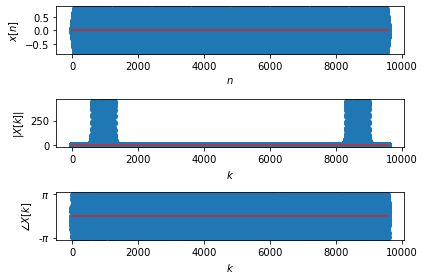

In [30]:
X_scale = np.fft.fft(C_scale_wav_2)
plot_signal_and_spectrum(C_scale_wav_2, X_scale)

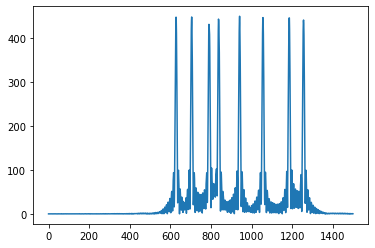

In [56]:
plt.plot(np.abs(X_scale[:1500]))
plt.show()

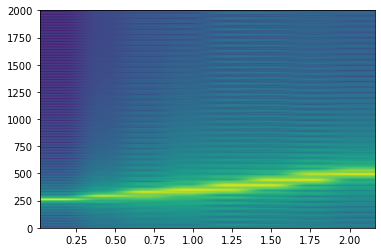

In [53]:
NFFT = 1200
length = C_scale_wav_2.size - C_scale_wav_2.size % NFFT
plt.specgram(C_scale_wav_2[:length], NFFT, fs2)
plt.show()

#### 문제 15: 이번 실습을 통해서 새로 알게된 내용을 적어라.